In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
import skimage.io as io
import scipy

# Leitura da Imagem.

In [ ]:
# read the image
impath='/content/drive/MyDrive/EXPA/ML-Segmentation/Etapa2/Sandstone-modelo-etapa2.jpg'
image = cv.imread(impath)

# convert to RGB
image = cv.cvtColor(image, cv.COLOR_BGR2RGB)

# reshape the image to a 2D array of pixels and 3 color values (RGB)
pixel_values = image.reshape((-1, 3))

# convert to float
pixel_values = np.float32(pixel_values)

# define stopping criteria
criteria = (cv.TERM_CRITERIA_EPS + cv.TERM_CRITERIA_MAX_ITER, 100, 0.2)


# Alteração do valor do Número de Clusters (k>0)
>cv.kmeans: https://docs.opencv.org/3.4/d1/d5c/tutorial_py_kmeans_opencv.html

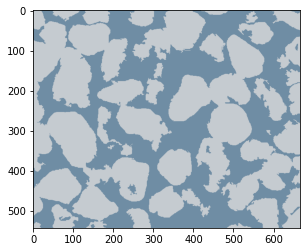

In [ ]:

# number of clusters (K)
k=2
_, labels, (centers) = cv.kmeans(pixel_values, k, None, criteria, 10, cv.KMEANS_RANDOM_CENTERS)

# convert back to 8 bit values
centers = np.uint8(centers)

# flatten the labels array
labels = labels.flatten()

# convert all pixels to the color of the centroids
segmented_image = centers[labels.flatten()]

# reshape back to the original image dimension
segmented_image = segmented_image.reshape(image.shape)

# show the image
plt.imshow(segmented_image)
plt.show()


# Desabilite um dos cluster remanescente.

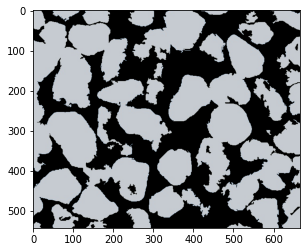

True

In [ ]:

masked_image = np.copy(image)

# convert to the shape of a vector of pixel values
masked_image = masked_image.reshape((-1, 3))

# color (i.e cluster) to disable
c=0
cluster = c
masked_image[labels == cluster] = [0, 0, 0]

# convert back to original shape
masked_image = masked_image.reshape(image.shape)

# show the image
plt.imshow(masked_image)
plt.show()
masked_image = cv.cvtColor(masked_image, cv.COLOR_RGB2BGR)
cv.imwrite(impath[:-4].split('/')[-1]+'_kmeans.jpg',masked_image)
# cv2.imwrite("INSIRA O CAMINHO E NOME DO ARQUIVO QUE DESEJA SALVAR" , cv2.cvtColor(show, cv2.COLOR_BGR2RGB))